In [318]:
# importing all necessary packages or libraries
import requests
import pandas as pd
import numpy as np
import seaborn as sb
import re
import os
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt
%matplotlib inline

# Step 1: Gathering Data

## Loading the first dataset from the local drive

In [253]:
# loading the provided twitter archive csv file to data frame

df_arc_tw = pd.read_csv('twitter-archive-enhanced.csv')
df_arc_tw.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


## Downloading the second data from the provided link using Request library.

In [98]:
# accessing the provided url
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

In [99]:
# the output "<Response [200]>" indicates that the request was succesful
# creating a file name from he provided url, and writing the accessed content to the newly created file
with open(url.split('/')[-1], mode='wb') as img_data:
    img_data.write(response.content)

In [254]:
# confirming download by listing current directory
os.listdir('.')

['.ipynb_checkpoints',
 'image-predictions.tsv',
 'tweet_archive_master',
 'tweet_json.txt',
 'twitter-archive-enhanced.csv',
 'wrangle_act.ipynb']

In [255]:
# loading the second dataset to a padas dataframe
df_img = pd.read_csv('image-predictions.tsv', sep='\t')
df_img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## Getting the third dataset using the method provided to students with mobile verification issues

In [256]:
twt_jsn = []
with open('tweet_json.txt', 'r') as file:
    # Reading each of the lines of the txt file
    for line in file:
        # Processing each of the lines to a json file object
        twts = json.loads(line)
        tweet_id = twts['id']
        retweet_count = twts['retweet_count']
        favorite_count = twts['favorite_count']
        # Appending each json object to our empty list
        twt_jsn.append({'tweet_id': tweet_id,
                        'retweet_count': retweet_count,
                        'favorite_count': favorite_count})

In [257]:
twt_jsn = pd.DataFrame(twt_jsn)
twt_jsn.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


# Step 2: Assessing Data

### Issues that must be assessed are:

1. We only want original ratings that have images, no retweets. Though there are over 5000 tweets in the dataset, not all are dog ratings, and some are retweets.

2. At least 8 quality issues and at least 2 tidiness issues in this dataset must be assess and clean.

3. The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.

4. We do not need to gather the tweets beyond August 1st, 2017. You can as we won't be able to gather the image predictions for these tweets because we don't have access to the algorithm used.

## Asessing Archive Data

Now that allrequired data have been gathered, we will be assessing the data for quality and tidiness issues. This will be done visually and programmatically.

## Data 1

In [258]:
df_arc_tw

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [259]:
df_arc_tw.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
665,790698755171364864,NaN,NaN,2016-10-24 23:37:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mosby. He appears to be rather h*ckin ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/790698755...,12,10,Mosby,None,None,None,None
2111,670442337873600512,NaN,NaN,2015-11-28 03:21:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Koda. He's large. Looks very soft. Great ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670442337...,11,10,Koda,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
1313,706904523814649856,NaN,NaN,2016-03-07 18:09:06 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Ever seen a dog pet another dog? Both 13/10 tr...,NaN,NaN,NaN,https://vine.co/v/iXQAm5Lrgrh,13,10,None,None,None,None,None
213,851591660324737024,NaN,NaN,2017-04-11 00:24:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh jeez u did me quite the spook little fella....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/851591660...,11,10,None,None,None,None,None


In [260]:
df_arc_tw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [261]:
df_arc_tw.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [262]:
# visually checking the name column for potential issues
df_arc_tw['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

### There were invalid names in the column which included lowercase alphabets, None, etc.

In [263]:
# extracting the lowercase words from "name" column.
ex_nm = df_arc_tw.name.str.extractall(r'(\b[a-z]+\b)')[0].tolist()
invalid_names = set(ex_nm)
invalid_names

{'a',
 'actually',
 'all',
 'an',
 'by',
 'getting',
 'his',
 'incredibly',
 'infuriating',
 'just',
 'life',
 'light',
 'mad',
 'my',
 'not',
 'officially',
 'old',
 'one',
 'quite',
 'space',
 'such',
 'the',
 'this',
 'unacceptable',
 'very'}

In [264]:
# Let's add None to the set
invalid_names.update(['None'])
invalid_names

{'None',
 'a',
 'actually',
 'all',
 'an',
 'by',
 'getting',
 'his',
 'incredibly',
 'infuriating',
 'just',
 'life',
 'light',
 'mad',
 'my',
 'not',
 'officially',
 'old',
 'one',
 'quite',
 'space',
 'such',
 'the',
 'this',
 'unacceptable',
 'very'}

In [265]:
# Checking the distributions for rating_numerator and rating_denominator.
df_arc_tw[['rating_numerator','rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [266]:
# assessing text and rating visually to see if there is any incorrectness. This is for ratings with rating_numerator >=10
df_arc_tw.query('rating_numerator >= 10')[['text', 'rating_denominator', 'rating_numerator']]

,text,rating_denominator,rating_numerator
0,This is Phineas. He's a mystical boy. Only eve...,10,13
1,This is Tilly. She's just checking pup on you....,10,13
2,This is Archie. He is a rare Norwegian Pouncin...,10,12
3,This is Darla. She commenced a snooze mid meal...,10,13
4,This is Franklin. He would like you to stop ca...,10,12
...,...,...,...
2339,Oh my. Here you are seeing an Adobe Setter giv...,10,11
2343,Let's hope this flight isn't Malaysian (lol). ...,10,10
2345,This is the happiest dog you will ever see. Ve...,10,10
2348,Here is a Siberian heavily armored polar bear ...,10,10


In [267]:
# checking text and rating_denominator visually to see if there is any incorrectness. This is for ratings with rating_denominator >=20
df_arc_tw.query('rating_denominator >= 20')[['text','rating_denominator', 'rating_numerator']]

,text,rating_denominator,rating_numerator
433,The floofs have been released I repeat the flo...,70,84
902,Why does this never happen at my front door......,150,165
1120,Say hello to this unbelievably well behaved sq...,170,204
1165,Happy 4/20 from the squad! 13/10 for all https...,20,4
1202,This is Bluebert. He just saw that both #Final...,50,50
1228,Happy Saturday here's 9 puppers on a bench. 99...,90,99
1254,Here's a brigade of puppers. All look very pre...,80,80
1274,"From left to right:\nCletus, Jerome, Alejandro...",50,45
1351,Here is a whole flock of puppers. 60/50 I'll ...,50,60
1433,Happy Wednesday here's a bucket of pups. 44/40...,40,44


In [268]:
print(df_arc_tw.iloc()[1165].text)

Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a


In [269]:
# Above, we can see that there was an error in the rating extraction. The actual rating is 13/10 and not 4/20. 
# The latter was pointing to the date the post was made 

## Data 2

In [270]:
df_img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [271]:
df_img.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1805,832273440279240704,https://pbs.twimg.com/ext_tw_video_thumb/83227...,1,Pembroke,0.134081,True,ice_bear,0.051928,False,pug,0.044311,True
1091,719367763014393856,https://pbs.twimg.com/media/Cfu1KSRXEAACC5X.jpg,1,swing,0.171486,False,soft-coated_wheaten_terrier,0.050971,True,Tibetan_terrier,0.047759,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True
713,685325112850124800,https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg,1,golden_retriever,0.586937,True,Labrador_retriever,0.398260,True,kuvasz,0.005410,True
388,673355879178194945,https://pbs.twimg.com/media/CVg9mTYWIAAu7J6.jpg,1,Rottweiler,0.529248,True,miniature_pinscher,0.168296,True,Appenzeller,0.100452,True


In [272]:
df_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [273]:
df_img.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


## Data 3

In [274]:
twt_jsn.sample(5)

,tweet_id,retweet_count,favorite_count
1128,729113531270991872,370,2054
2087,670789397210615808,255,700
1520,690649993829576704,325,1435
563,802323869084381190,6808,18124
2144,669923323644657664,64,250


In [275]:
twt_jsn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [276]:
twt_jsn.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


# Cleaning

In [277]:
# Make copies of dataframes before cleaning

df_arc_tw_clean = df_arc_tw.copy()
twt_jsn_clean = twt_jsn.copy()
df_img_clean = df_img.copy()

### Documentations

#### Quality issues:

1. For better analysis, timestamp and retweeted_status_timestamp columns should be in datetime format instead of string.

2. The column, text, includes url

3. Some columns are in the wrong datatype 

4. According the img prediction algorithm, Not all are dogs

5. dog stage columns are in wrong datatype

6. wrongly extracted rating values at index 1165

7. Some rows contain invalid names (lower case alphabets, etc)

8. Some rows contain retweets instead of original post

#### Tidiness Issues
1. The dog stage names formed their own columns
2. The three datasets contain related information but form different tables

### Cleaning the first issue

In [278]:
# Changnging 'timestamp' and 'retweeted_status_timestamp' datatype to datetime
df_arc_tw_clean['timestamp']= pd.to_datetime(df_arc_tw_clean['timestamp'])
df_arc_tw_clean['retweeted_status_timestamp']= pd.to_datetime(df_arc_tw_clean['retweeted_status_timestamp'])
df_arc_tw_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Cleaning the second Issue

In [279]:
df_arc_tw_clean['cleantext'] = df_arc_tw_clean['text'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

In [280]:
df_arc_tw_clean = df_arc_tw_clean.drop(columns='text')

In [281]:
# It seems urls have been removed.
df_arc_tw_clean['cleantext'].sample(5)

1995    Meet Scott. Just trying to catch his train to ...
823     Say hello to Carbon. This is his first time sw...
1969    Take a moment and appreciate how these two dog...
2298    After much debate this dog is being upgraded t...
1756        This is Mia. She makes awful decisions. 8/10 
Name: cleantext, dtype: object

### Cleaning the third issue

### Some columns are in the wrong datatype 

In [282]:
# [retweeted_status_user_id, retweeted_status_id, tweet_id] should be converted to string

string_list = ['retweeted_status_user_id', 'retweeted_status_id', 'tweet_id']

for item in string_list:
    df_arc_tw_clean[item] = df_arc_tw_clean[item].astype(str)

In [283]:
df_arc_tw_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   retweeted_status_id         2356 non-null   object             
 6   retweeted_status_user_id    2356 non-null   object             
 7   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 8   expanded_urls               2297 non-null   object             
 9   rating_numerator            2356 non-null   int64              
 10  rating_denominator          2356 non-null   int64           

## Cleaning the fourth issue

In [284]:
df_img_clean = df_img_clean[df_img.p1_dog == True]

In [285]:
#The column should now return all True
df_img_clean.p1_dog.unique()

array([ True])

## Cleaning the fifth issue
> Because this caused issues when melting the dog stage columns, I have decided to handle it last. Please find it below

## Cleaning the sixth issue

In [286]:
# wrongly extracted rating values at index 1165
# Change the value at that index to the appropriate one  
df_arc_tw_clean['rating_numerator'].iat[1165] = 13    #for rating_numerator
df_arc_tw_clean['rating_denominator'].iat[1165] = 10    #for rating_denominator

In [287]:
print(df_arc_tw_clean['rating_numerator'].iat[1165])
print(df_arc_tw_clean['rating_denominator'].iat[1165])

13
10


## Cleaning the seventh issue

In [288]:
# Drop rows with invalid names (starts with lowercase, etc)
for name in df_arc_tw_clean['name']:
    if name in invalid_names:
        df_arc_tw_clean['name'].replace(name, np.nan, inplace=True)
    else:
        pass

In [289]:
#  Testing the code. This should return nothing if all invalid names were successfully replaced
for name in df_arc_tw_clean['name']:
    if name in invalid_names:
        print(name)
    else:
        pass
print('All invalid names have been replaced!')

All invalid names have been replaced!


In [290]:
df_arc_tw_clean['name'].value_counts()   #Invalid names have been replaced

Charlie       12
Lucy          11
Cooper        11
Oliver        11
Lola          10
              ..
Devón          1
Gert           1
Dex            1
Ace            1
Christoper     1
Name: name, Length: 931, dtype: int64

## Clean the Eighteth issue

In [291]:
# Some rows contain retweets instead of original post
# If either of the following columns contain non-null values, then drop the entire record because it is a retweet:
#  - retweeted_status_timestamp
#  - retweeted_status_user_id
#  - retweeted_status_id 
#  - Since they all contain the same number of nun-null values, let's use just one of them 'retweeted_status_id'

df_arc_tw_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'cleantext'],
      dtype='object')

In [292]:
df_arc_tw_clean = df_arc_tw_clean[df_arc_tw_clean.retweeted_status_timestamp.isnull()]
df_arc_tw_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,cleantext
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",nan,nan,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",nan,nan,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,This is Tilly. She's just checking pup on you....
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",nan,nan,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,This is Archie. He is a rare Norwegian Pouncin...
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",nan,nan,NaT,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,This is Darla. She commenced a snooze mid meal...
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",nan,nan,NaT,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,This is Franklin. He would like you to stop ca...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",nan,nan,NaT,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,None,None,None,None,Here we have a 1949 1st generation vulpix. Enj...
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",nan,nan,NaT,https://twitter.com/dog_rates/status/666044226...,6,10,NaN,None,None,None,None,This is a purebred Piers Morgan. Loves to Netf...
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",nan,nan,NaT,https://twitter.com/dog_rates/status/666033412...,9,10,NaN,None,None,None,None,Here is a very happy pup. Big fan of well-main...
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",nan,nan,NaT,https://twitter.com/dog_rates/status/666029285...,7,10,NaN,None,None,None,None,This is a western brown Mitsubishi terrier. Up...


In [293]:
df_arc_tw_clean.floofer.unique()

array(['None', 'floofer'], dtype=object)

In [294]:
# Test
df_arc_tw_clean.retweeted_status_id.value_counts(dropna=False)    #Now, there are only rows with empty value for retweeted_status_id

nan    2175
Name: retweeted_status_id, dtype: int64

In [295]:
# Drop the following rows since they are now empty
#  - retweeted_status_timestamp
#  - retweeted_status_user_id
#  - retweeted_status_id 

df_arc_tw_clean = df_arc_tw_clean.drop(columns=['retweeted_status_timestamp', 'retweeted_status_user_id', 'retweeted_status_id'])
df_arc_tw_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'expanded_urls', 'rating_numerator', 'rating_denominator',
       'name', 'doggo', 'floofer', 'pupper', 'puppo', 'cleantext'],
      dtype='object')

## Handle Tidiness Issues

### 1. The dog stage names formed their own columns

In [296]:
# Convert the four columns from wide to long form

df_arc_tw_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'expanded_urls', 'rating_numerator', 'rating_denominator',
       'name', 'doggo', 'floofer', 'pupper', 'puppo', 'cleantext'],
      dtype='object')

In [297]:
# First, replace None with NaN
columns = ['doggo', 'floofer', 'pupper', 'puppo']

def remove_none(df, col, val, replacement):
    for i in col:
        df[i] = df[i].replace(val, replacement)
    return

In [298]:
remove_none(df_arc_tw_clean, columns, 'None', '')

In [299]:
df_arc_tw_clean.doggo.unique()

array(['', 'doggo'], dtype=object)

In [300]:
df_arc_tw_clean.floofer.unique()

array(['', 'floofer'], dtype=object)

In [301]:
df_arc_tw_clean.pupper.unique()

array(['', 'pupper'], dtype=object)

In [302]:
df_arc_tw_clean.puppo.unique()

array(['', 'puppo'], dtype=object)

In [303]:
df_arc_tw_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'expanded_urls', 'rating_numerator', 'rating_denominator',
       'name', 'doggo', 'floofer', 'pupper', 'puppo', 'cleantext'],
      dtype='object')

In [304]:
# apply pd.melt function to the dataframe

var = df_arc_tw_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'])

# Now, apply the function
df_arc_tw_clean = pd.melt(frame= df_arc_tw_clean, id_vars = var, 
                    value_vars=['doggo', 'floofer', 'pupper', 'puppo'],
                    value_name='stage'
                   )

In [305]:
df_arc_tw_clean.stage.value_counts()

           8344
pupper      234
doggo        87
puppo        25
floofer      10
Name: stage, dtype: int64

In [306]:
# finally, drop '' rows
df_arc_tw_clean = df_arc_tw_clean[df_arc_tw_clean.stage != '']

In [307]:
# Test
df_arc_tw_clean.stage.value_counts()

pupper     234
doggo       87
puppo       25
floofer     10
Name: stage, dtype: int64

### 2. The three datasets contain related information but form different tables
Let's merge the three tables

In [308]:
# list of columns in each table and their datatypes
df_arc_tw_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356 entries, 9 to 7430
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               356 non-null    object             
 1   in_reply_to_status_id  9 non-null      float64            
 2   in_reply_to_user_id    9 non-null      float64            
 3   timestamp              356 non-null    datetime64[ns, UTC]
 4   source                 356 non-null    object             
 5   expanded_urls          350 non-null    object             
 6   rating_numerator       356 non-null    int64              
 7   rating_denominator     356 non-null    int64              
 8   name                   188 non-null    object             
 9   cleantext              356 non-null    object             
 10  variable               356 non-null    object             
 11  stage                  356 non-null    object            

In [309]:
df_img_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1532 entries, 0 to 2073
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1532 non-null   int64  
 1   jpg_url   1532 non-null   object 
 2   img_num   1532 non-null   int64  
 3   p1        1532 non-null   object 
 4   p1_conf   1532 non-null   float64
 5   p1_dog    1532 non-null   bool   
 6   p2        1532 non-null   object 
 7   p2_conf   1532 non-null   float64
 8   p2_dog    1532 non-null   bool   
 9   p3        1532 non-null   object 
 10  p3_conf   1532 non-null   float64
 11  p3_dog    1532 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 124.2+ KB


In [310]:
twt_jsn_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [311]:
# Convert tweet_id to string in twt_jsn and df_img tables to merge with df_arc_tw
twt_jsn_clean.tweet_id = twt_jsn_clean.tweet_id.astype(str)
df_img_clean.tweet_id = df_img_clean.tweet_id.astype(str)

In [312]:
# Merge tables

tweet_archive_cleaned = pd.merge(df_arc_tw_clean, df_img_clean, on='tweet_id', how='left')
tweet_archive_cleaned.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'expanded_urls', 'rating_numerator', 'rating_denominator',
       'name', 'cleantext', 'variable', 'stage', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'],
      dtype='object')

In [313]:
tweet_archive_cleaned = pd.merge(tweet_archive_cleaned, twt_jsn_clean, on='tweet_id', how='left')
tweet_archive_cleaned.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'expanded_urls', 'rating_numerator', 'rating_denominator',
       'name', 'cleantext', 'variable', 'stage', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'retweet_count', 'favorite_count'],
      dtype='object')

## ISSUE 5 CARRIED OVER

In [314]:
df_arc_tw_clean.stage = df_arc_tw_clean.stage.astype('category')
df_arc_tw_clean.stage.dtype

CategoricalDtype(categories=['doggo', 'floofer', 'pupper', 'puppo'], ordered=False)

## Export to CSV file

In [315]:
master_cleaned = tweet_archive_cleaned.to_csv('tweet_archive_master', index=False)

## Visualization

In [316]:
tweet_archive_cleaned.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,expanded_urls,rating_numerator,rating_denominator,name,cleantext,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,890240255349198849,NaN,NaN,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,This is Cassie. She is a college pup. Studying...,...,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,7711,32467
1,884162670584377345,NaN,NaN,2017-07-09 21:29:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,Meet Yogi. He doesn't have any important dog m...,...,0.707046,True,malinois,0.199396,True,Norwegian_elkhound,0.049148,True,3128,20771
2,872967104147763200,NaN,NaN,2017-06-09 00:02:31+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/872967104...,12,10,NaN,Here's a very large dog. He has a date later. ...,...,0.476913,True,Chesapeake_Bay_retriever,0.174145,True,German_short-haired_pointer,0.092861,True,5669,28031
3,871515927908634625,NaN,NaN,2017-06-04 23:56:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/871515927...,12,10,Napolean,This is Napolean. He's a Raggedy East Nicaragu...,...,0.974781,True,briard,0.020041,True,swab,0.003228,False,3628,20730
4,871102520638267392,NaN,NaN,2017-06-03 20:33:19+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/animalcog/status/871075758...,14,10,NaN,Never doubt a doggo 14/10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5764,21461


In [317]:
tweet_archive_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356 entries, 0 to 355
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               356 non-null    object             
 1   in_reply_to_status_id  9 non-null      float64            
 2   in_reply_to_user_id    9 non-null      float64            
 3   timestamp              356 non-null    datetime64[ns, UTC]
 4   source                 356 non-null    object             
 5   expanded_urls          350 non-null    object             
 6   rating_numerator       356 non-null    int64              
 7   rating_denominator     356 non-null    int64              
 8   name                   188 non-null    object             
 9   cleantext              356 non-null    object             
 10  variable               356 non-null    object             
 11  stage                  356 non-null    object             

In [328]:
tweet_archive_cleaned.describe()

,in_reply_to_status_id,in_reply_to_user_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,9.000000e+00,9.000000e+00,356.000000,356.0,238.000000,238.000000,238.000000,238.000000,356.000000,356.000000
mean,7.417154e+17,8.116723e+16,11.168539,10.0,1.277311,0.648640,0.140397,0.054559,3766.162921,10899.570225
std,3.829648e+16,2.435017e+17,1.913545,0.0,0.635442,0.248697,0.110030,0.049780,7155.766816,15817.855617
min,6.706684e+17,1.584641e+07,3.000000,10.0,1.000000,0.100499,0.000046,0.000034,26.000000,269.000000
25%,7.331095e+17,4.196984e+09,10.000000,10.0,1.000000,0.438245,0.051076,0.012783,883.000000,2731.500000
50%,7.476487e+17,4.196984e+09,11.000000,10.0,1.000000,0.699990,0.115138,0.037531,1820.000000,5592.500000
75%,7.638652e+17,4.196984e+09,12.000000,10.0,1.000000,0.856158,0.205952,0.086114,3634.000000,12296.500000
max,8.008580e+17,7.305050e+17,27.000000,10.0,4.000000,0.999828,0.467678,0.227677,79515.000000,132810.000000


#### The mean rating numerator = 11.16

#### The mean rating denominator = 10

### What is the distribution of the dog stages?

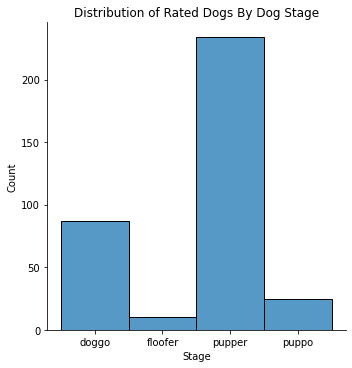

In [333]:
fig = sb.displot(data=tweet_archive_cleaned, x='stage', kind='hist')
fig.set(xlabel='Stage', ylabel='Count', title='Distribution of Rated Dogs By Dog Stage');

#### There pupper dog stage significantly outnumbered other dog stages analysed

### Which dog stage tends to get higher ratings?

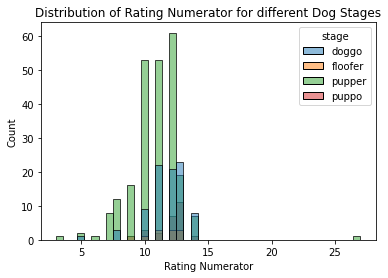

In [334]:
fig = sb.histplot(data=tweet_archive_cleaned, x='rating_numerator', hue='stage')
fig.set(xlabel='Rating Numerator', ylabel='Count', title='Distribution of Rating Numerator for different Dog Stages');

#### The pupper dog stage also tends to get higher ratings

### Does Favorite count (Likes) correlate with Retweets?

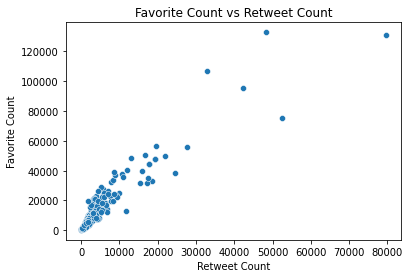

In [331]:
# scatterplot of Retweet count and favorite count

fig = sb.scatterplot(data=tweet_archive_cleaned, x='retweet_count', y='favorite_count')
fig.set(xlabel='Retweet Count', ylabel='Favorite Count', title='Favorite Count vs Retweet Count');

#### Retweet_count correlates strongly with favorite_count. This means that dogs with high retweets also tend to get high likes

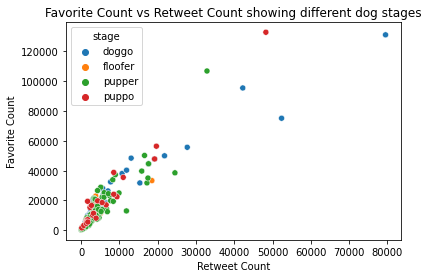

In [332]:
fig = sb.scatterplot(data=tweet_archive_cleaned, x='retweet_count', y='favorite_count', hue='stage')
fig.set(xlabel='Retweet Count', ylabel='Favorite Count', title='Favorite Count vs Retweet Count showing different dog stages');

#### fom above plot, we can confirm further that this relationship holds irrespective of dog stage